## Laboratorios de uso de Pyhton para Métodos Numéricos - Ejemplo Integración

Introduciremos a Python para los Métodos Numéricos comenzando con la integración numérica de una función como ejemplo (este tema lo veremos a profundidad en una futura clase), un tema central en el que profundizaremos más adelante. En particular, analizaremos las siguientes integrales:

$$
\begin{aligned}
  I_1 &= \int_0^1 \text{d}x \, x^2 = \tfrac{1}{3}, \\ I_2 &= \int_0^1 \text{d}x \, \sqrt{1 - x^2} = \tfrac{\pi}{4}.
\end{aligned}
$$

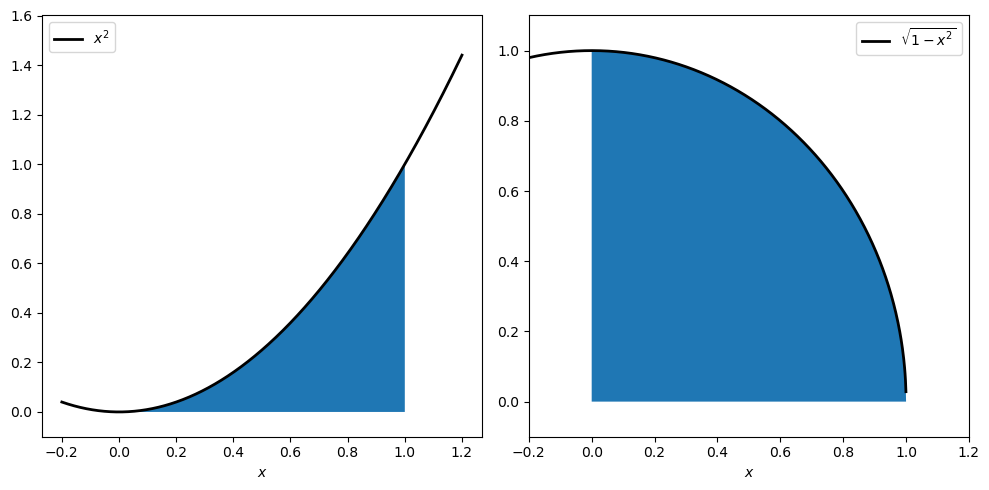

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

x = numpy.linspace(-0.2, 1.2, 1000)
x_integral = numpy.linspace(0.0, 1.0, 1000)

fig = pyplot.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.fill_between(x_integral, x_integral**2)
ax1.plot(x, x**2, 'k-', lw=2, label=r"$x^2$")
ax1.set_xlabel(r"$x$")
ax1.set_ylim(-0.1, 1.6)
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(122)
ax2.fill_between(x_integral, numpy.sqrt(1.0-x_integral**2))
ax2.plot(x[x<=1.0], numpy.sqrt(1.0-x[x<=1.0]**2), 'k-', lw=2, label=r"$\sqrt{1-x^2}$")
ax2.set_xlabel(r"$x$")
ax2.set_xlim(-0.2, 1.2)
ax2.set_ylim(-0.1, 1.1)
ax2.legend()

fig.tight_layout()
pyplot.show()

## Integración Numerica Simple

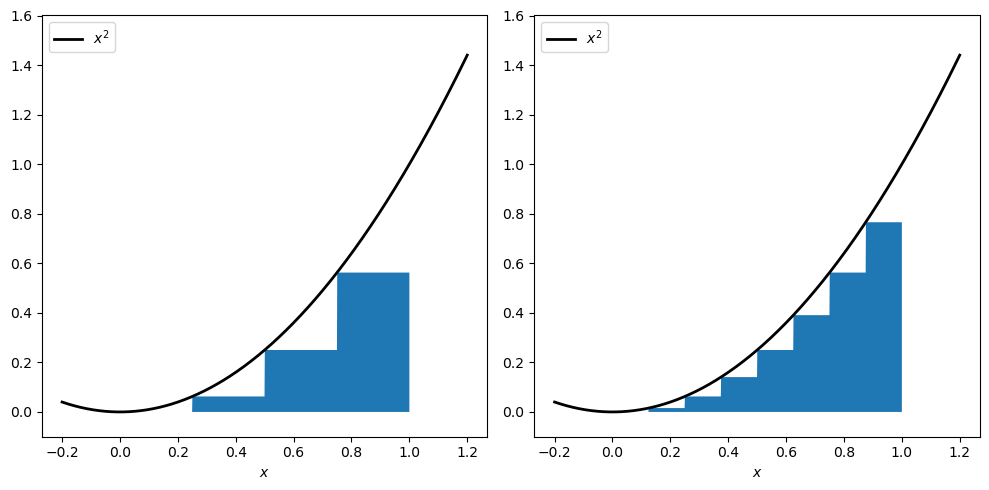

In [3]:
def stripes(f, x, Nstripes):
    """
    Show the stripes
    """
    boundaries = numpy.linspace(0.0, 1.0, Nstripes+1)
    integrand = numpy.zeros_like(x)
    for i in range(1, Nstripes):
        integrand += numpy.piecewise(x, 
                                     [x<boundaries[i], x>=boundaries[i]], 
                                     [0.0, f(boundaries[i]) - f(boundaries[i-1])])
    return integrand

def fcn_squr(x):
    return x**2

f = lambda x : x**2

x = numpy.linspace(-0.2, 1.2, 1000)
x_integral = numpy.linspace(0.0, 1.0, 1000)

fig = pyplot.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.fill_between(x_integral, stripes(f, x_integral, 4))
ax1.plot(x, x**2, 'k-', lw=2, label=r"$x^2$")
ax1.set_xlabel(r"$x$")
ax1.set_ylim(-0.1, 1.6)
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(122)
ax2.fill_between(x_integral, stripes(f, x_integral, 8))
ax2.plot(x, x**2, 'k-', lw=2, label=r"$x^2$")
ax2.set_xlabel(r"$x$")
ax2.set_ylim(-0.1, 1.6)
ax2.legend(loc='upper left')

fig.tight_layout()
pyplot.show()

La región que estamos integrando se divide en $N$ tramos. En las figuras, hay 4 tramos en la izquierda y 8 tramos en la derecha. La altura de cada franja es el valor de la función, $x^2$, en el borde izquierdo de la franja. El área de la franja es la altura multiplicada por el ancho, donde el ancho es 1 dividido por el número de franjas. El área total es la suma de las áreas de todas las franjas. Este total aproxima la integral que queremos, $I_1$, la cual debería ser $1/3$.

Probemos esto en la consola para dos tramos.

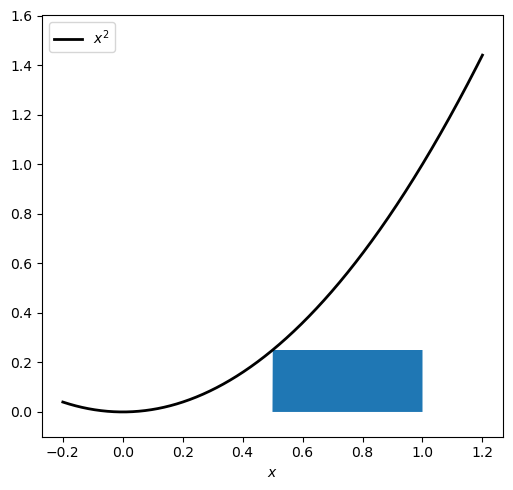

In [4]:
fig = pyplot.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.fill_between(x_integral, stripes(f, x_integral, 2))
ax1.plot(x, x**2, 'k-', lw=2, label=r"$x^2$")
ax1.set_xlabel(r"$x$")
ax1.set_ylim(-0.1, 1.6)
ax1.legend(loc='upper left')

fig.tight_layout()
pyplot.show()

In [ ]:
0**2 * 0.5 + 0.5**2 * 0.5

0.125

In [ ]:
(0**2 + (1/2)**2) * 1/2

0.125

La altura de cada tramo está dada por el valor en el borde izquierdo: $ (0, \tfrac{1}{2})$ son las ubicaciones $ (x) $ del borde izquierdo, y la función es $( x^2 ) $. El ancho de cada tramo es $ ( \tfrac{1}{2} ) $.

Vemos que el resultado no es muy preciso, así que probemos con cuatro tramos.

In [7]:
(0**2 + (1/4)**2 + (2/4)**2 + (3/4)**2) * 1/4

0.21875

Vemos que el resultado fue más preciso (aunque aún no es bueno), pero tuvimos que escribir mucho. Además, está comenzando a ser confuso entender lo que significan todos los términos. Introduzcamos algunas *variables* para mantener las cosas más claras.

## Variables

¿Cuáles son los puntos y cuáles son los valores de la función? ¿Cuál es el ancho del tramo? Estas son cantidades significativas sobre las que razonamos, y queremos que nuestro código lo refleje. En lugar de trabajar con números puros, queremos asignarles nombres a las cosas.

Volvamos al caso con cuatro tramos.

In [12]:
Nstrips = 4
width = 1 / Nstrips
integral_4 = (0**2 + (1/Nstrips)**2 + (2/Nstrips)**2 + (3/Nstrips)**2) * width

Ahora está más claro cuáles son los términos en la suma. Al usar valores todo queda en memoria. Para producir una salida, escribe el nombre de la variable:

In [ ]:
integral_4

o usa print()

In [ ]:
print(integral_4)

Esto se puede utilizar para explicar la salida de manera más clara:

In [ ]:
print("El resultado usando", Nstrips, "tramos es", integral_4)

##### Nota

Existen algunas restricciones sobre el *nombre* de una variable, y algunas convenciones que deberías seguir. Para mantenerlo simple:

* Siempre comienza con una letra
* Usa solo letras, números o guiones bajos
* Siempre usa minúsculas
* Nunca uses espacios
* Haz que el nombre de la variable sea significativo

## Bucles (Loops)

Los bucles son una herramienta fundamental en programación, ya que permiten ejecutar un bloque de código varias veces de manera automática. En Python, existen dos tipos principales de bucles: for y while. A continuación, explicamos cómo funcionan.

In [ ]:
Nstrips = 4
width = 1 / Nstrips
integral_4 = 0
points = 0, 1, 2, 3
for point in points:
    print("En el punto", point)
    height = (point / Nstrips)**2
    integral_4 = integral_4 + width * height
print("El resultado final es", integral_4)

In [ ]:
Nstrips = 4
width = 1 / Nstrips
integral_4 = 0
i = 0

while i < Nstrips:
    print("En el punto", i)
    height = (i / Nstrips)**2
    integral_4 = integral_4 + width * height
    i = i + 1
print("El resultado final es", integral_4)

Veamos los pasos clave aquí. Tenemos varios puntos sobre los que queremos iterar: `points = 0, 1, 2, 3`. El bucle se define mediante la instrucción `for`. Toma cada miembro del conjunto `points` y establece que la variable `point` tenga ese valor, como se muestra con los valores impresos en la pantalla. Luego ejecuta las instrucciones de código que están indentadas para cada miembro del conjunto, en este caso, sumando todas las áreas de los tramos.

Para definir un bucle, debes usar la sintaxis `for cosa in conjunto:`, con los dos puntos al final de la línea. Las instrucciones que se ejecutan para cada miembro del conjunto son aquellas que están indentadas: usa la tecla TAB para esto.

Los elementos sobre los que iteras no necesitan ser enteros. El siguiente bucle realiza la misma tarea:

In [ ]:
integral_4 = 0
locations = 0.0, 0.25, 0.5, 0.75
for location in locations:
    print("At location", location)
    height = location**2
    integral_4 = integral_4 + width * height
print("Final result is", integral_4)

Sigue siendo molesto tener que escribir todos los puntos o ubicaciones manualmente. En su lugar, deberíamos hacer que el ordenador los genere. Hay una función estándar para esto: `range`.

In [ ]:
Nstrips = 4
width = 1 / Nstrips
integral_4 = 0
for point in range(Nstrips):
    print("At point", point)
    height = (point / Nstrips)**2
    integral_4 += width * height
print("Final result is", integral_4)

Cuando se usa en un bucle como este, `range(Nstrips)` genera cada número entero desde `0` hasta `Nstrips-1`. Ten en cuenta que **no** incluye el último valor `Nstrips`.

Ahora podemos hacer fácilmente el caso de ocho tramos, o incluso el caso de $64$ tramos:

In [ ]:
Nstrips = 8
width = 1 / Nstrips
integral_8 = 0
for point in range(Nstrips):
    height = (point / Nstrips)**2
    integral_8 = integral_8 + width * height
print("Final result for", Nstrips, "strips is", integral_8)

Nstrips = 64
width = 1 / Nstrips
integral_64 = 0
for point in range(Nstrips):
    height = (point / Nstrips)**2
    integral_64 = integral_64 + width * height
print("Final result for", Nstrips, "strips is", integral_64)

Podemos ver que se está acercando a la respuesta correcta de \( \frac{1}{3} \). Sin embargo, seguimos repitiendo mucho código y hay muchas oportunidades de cometer errores. Vamos a crear nuestra propia función para evitar eso.

## Funciones

Ahora podemos ver un patrón general para integrar la función \(x^2\). Queremos poder hacer esto para cualquier número de tramos con un solo comando. Lo logramos definiendo nuestra propia función:

In [29]:
def integral_1(Nstrips):
    """
    The first integral: integrate x**2 between 0 and 1.

    parameters
    ----------
    Nstrips : int
        The number of strips to use in the integral.
    """
    
    width = 1/Nstrips
    integral = 0
    for point in range(Nstrips):
        height = (point / Nstrips)**2
        integral = integral + width * height
    
    return integral

Primero, verifiquemos que esto reproduzca los resultados que obtuvimos antes:

In [ ]:
print(integral_1(4))
print(integral_1(8))
print(integral_1(64))
print(integral_1(1024))

Ahora, examinemos lo que hemos hecho. Hemos *definido* la función `integral_1` utilizando la línea `def integral_1(Nstrips):`. La palabra clave `def` indica que lo que sigue será una función. Lo siguiente, hasta los paréntesis, es el nombre de la función, en este caso `integral_1`. Esto debe obedecer las mismas reglas que los nombres de variables. Los nombres entre los paréntesis son los nombres de las variables de entrada. Estos son los nombres que se usarán internamente en la función. Si no hay entradas, aún necesitas los paréntesis (por ejemplo, `integral_1()`). Si hay más de una entrada, las separas con comas.

La línea que define el nombre de la función debe terminar con dos puntos. Esto es igual que en un bucle `for`. Lo que sigue también es similar a un bucle `for`: la función se define por las instrucciones que están indentadas (usando TAB) en relación con la línea que define la función.

Inmediatamente después de la línea que define la función, hay una cadena que describe lo que hace la función. Puedes imprimir esta cadena utilizando:

In [ ]:
help(integral_1)

A continuación tenemos el código real. Este es exactamente el bucle utilizado para definir la aproximación de la integral, con el resultado asignado a la variable llamada `integral`. La última línea es lo único nuevo. Una vez que se ha realizado el cálculo y la función ha hecho su trabajo, debe indicar qué información calculada debe "devolver" al llamador. Esto se hace utilizando la declaración `return`: todas las variables después de `return` serán la salida de la función. Si deseas devolver varias variables, sepáralas nuevamente con comas.

Ahora podemos llamar a la función con un número (mucho) mayor de tramos y ver qué tan cerca llegamos a la respuesta correcta de \( 1/3 \):

In [ ]:
print("One hundred strips:", integral_1(100))
print("One thousand strips:", integral_1(1000))
print("One million strips:", integral_1(1000000))

In [ ]:
fig = pyplot.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.fill_between(x_integral, stripes(f, x_integral, 1000))
ax1.plot(x, x**2, 'k-', lw=2, label=r"$x^2$")
ax1.set_xlabel(r"$x$")
ax1.set_ylim(-0.1, 1.6)
ax1.legend(loc='upper left')

fig.tight_layout()
pyplot.show()

## Scripts

Los Scripts son archivos con codigos de Python que se pueden corren como un todo. Abre un archivo nuevo (ya sea desde el menú de archivos o la barra de herramientas, tal como lo harías en un procesador de texto). Copia y pega las partes de tu código que deseas guardar. Como mínimo, tu archivo debería contener:

```python
(0**2 + (1/4)**2 + (2/4)**2 + (3/4)**2) * 1/4

Nstrips = 4
width = 1/Nstrips
integral_4 = 0
for point in range(Nstrips):
    print("En el punto", point)
    height = (point / Nstrips)**2
    integral_4 = integral_4 + width * height
print("El resultado final es", integral_4)

def integral_1(Nstrips):
    """
    La primera integral: integrar x**2 entre 0 y 1.
    """
    
    width = 1/Nstrips
    integral = 0
    for point in range(Nstrips):
        height = (point / Nstrips)**2
        integral = integral + width * height
    
    return integral

print("Cien tramos:", integral_1(100))
```

Guarda el archivo resultante en una ubicación adecuada (el Escritorio o en algún lugar de tu espacio de archivos) bajo el nombre `lab1_integral_1.py`. Nuevamente, los nombres de archivos deben seguir las mismas convenciones que los nombres de variables y funciones (sin espacios, en minúsculas, etc.), con la extensión de archivo `.py`.

## `numpy`

Recuerda que al principio también queríamos integrar

$$
  I_2 = \int_0^1 \text{d}x \, \sqrt{1 - x^2} = \tfrac{\pi}{4}.
$$

Para hacer esto, y para verificar el resultado, necesitamos una función que pueda calcular la raíz cuadrada y el valor de \( \pi \). Python estándar *no* proporciona ninguna de estas dos:

In [ ]:
sqrt(3)

In [ ]:
pi

Existen muchas bibliotecas de Python que proporcionan funciones y constantes útiles. Estas bibliotecas (generalmente) están compuestas por código Python. Por lo tanto, para acceder a las funciones y constantes, usamos la declaración `import`.

Una biblioteca clave que usaremos mucho es `numpy`, que es una abreviatura de **num**erical **Py**thon. Usando la consola, podemos obtenerla de la manera estándar y probarla como lo hicimos antes:

In [ ]:
import numpy
print(numpy.sqrt(3))
print(numpy.pi)

Usando `numpy`, ahora podemos escribir una función para integrar \( I_2 \). En el archivo `lab1_integral_5.py` podemos escribir (y luego ejecutar):

```python
import numpy

def integral_2(Nstrips):
    """
    La segunda integral: integrar sqrt(1-x**2) entre 0 y 1.
    """
    
    width = 1/Nstrips
    integral = 0
    for point in range(Nstrips):
        height = numpy.sqrt(1.0 - (point / Nstrips)**2)
        integral = integral + width * height
    
    return integral
    
if __name__ == "__main__":
    print("El valor correcto es pi/4:", numpy.pi/4)
    print("Cien tramos:", integral_2(100))
```

Notemos que para obtener el valor de \( \pi \) tuvimos que usar `numpy.pi`.

In [ ]:
import numpy as np

def integral_2(Nstrips):
    """
    La segunda integral: integrar sqrt(1-x**2) entre 0 y 1.
    """
    
    width = 1/Nstrips
    integral = 0
    for point in range(Nstrips):
        height = np.sqrt(1.0 - (point / Nstrips)**2)
        integral = integral + width * height
    
    return integral
    
if __name__ == "__main__":
    print("El valor correcto es pi/4:", numpy.pi/4)
    print("Cien tramos:", integral_2(100))

Ahora, las funciones que integran $I_1, I_2$ (e incluso $I_4$ ) son *extremadamente* similares. La única diferencia es cómo se evalúa la altura del tramo, es decir, cuál es el integrando. Podemos empezar a consolidar esto en una sola función para evitar la duplicación de código.

Crea un nuevo archivo (`integral.py`) que contenga el código más general para la integral:

```python
import numpy

def integral(f, Nstrips):
    """
    La integral general: integrar f entre 0 y 1.
    """
    
    width = 1/Nstrips
    integral = 0
    for point in range(Nstrips):
        height = f(point / Nstrips)
        integral = integral + width * height
    
    return integral
    
if __name__ == "__main__":
    
    def f_1(x):
        return x**2
    def f_2(x):
        return numpy.sqrt(1.0 - x**2)
    
    print("I_1, cien tramos:", integral(f_1, 100))
    print("I_2, cien tramos:", integral(f_2, 100))
```

Vemos que la función general `integral` ahora toma dos entradas. La primera es la función que se va a integrar. Esto cambia la línea que define la altura, que ahora utiliza esa función de integrando `f`. Después de eso, necesitamos definir los integrandos como funciones y luego llamar a nuestra función general.

In [ ]:
import integracion as inte

print(inte.integral(lambda x: x**2, 100))

## Funciones de `numpy`

La integral que estamos tratando de calcular es esencialmente una suma. Cada término en la suma se obtiene aplicando la misma función a un conjunto de puntos. Estos puntos están espaciados de manera uniforme o lineal.

Cada una de las operaciones mencionadas puede realizarse de manera más rápida y transparente utilizando `numpy`, aplicado a conjuntos completos de puntos, en lugar de nuestro método punto por punto anterior. Utilizaremos la consola para observar los pasos.

Para comenzar, asegúrate de que la consola tenga `numpy` disponible.

In [ ]:
import numpy
Nstrips = 4
locations = numpy.linspace(0.0, 1.0, Nstrips)
print(locations)
locations = numpy.linspace(0.0, 1.0, Nstrips, endpoint=False)
print(locations)

Hemos fijado nuevamente el número de tramos en cuatro. Queremos encontrar las ubicaciones espaciadas uniformemente entre \(0\) y \(1\), donde evaluaremos el integrando \(f\). La función `linspace` de `numpy` hace esto: el primer argumento es el inicio del intervalo, el segundo es el final y el tercero es el número de ubicaciones.

El problema con esto es que `linspace` coloca el último punto al final del intervalo, mientras que queremos usar "tramos", por lo que el último punto debería estar dentro del intervalo. Vemos esto en la salida de la primera llamada a `linspace`. En su lugar, configuramos el argumento *opcional* `endpoint` en `False`, para que sepa que no queremos que el último punto esté en el borde del intervalo.

La salida es un *array* de `numpy`. Esto es una colección, o vector, de números. Para acceder a valores individuales, podemos usar corchetes, comenzando desde \(0\):

In [ ]:
print(locations[0])
print(locations[2])
print(locations)

Podemos tratar tanto el array completo como los valores individuales como variables. Por ejemplo:

In [ ]:
locations[1] = 1.23
print(locations)

Para empezar, normalmente trataremos el array como un todo. Volvamos a su definición correcta:

In [49]:
locations = numpy.linspace(0.0, 1.0, Nstrips, endpoint=False)

A continuación, definimos el integrando. Vamos a hacer $I_1$:

In [50]:
def integrand(x):
    return x**2

Ahora queremos calcular las alturas, es decir, el valor del integrando en las ubicaciones. Con `numpy`, simplemente aplicamos la función al conjunto de ubicaciones:

In [ ]:
heights = integrand(locations)
print(heights)

Luego queremos multiplicar por el ancho, que es lo mismo que dividir por `Nstrips`, para obtener las áreas de los tramos. Nuevamente, podemos tratar el conjunto de alturas como si fuera un solo número:

In [ ]:
areas = heights / Nstrips
print(areas)

Finalmente, queremos sumar las áreas resultantes. `numpy` tiene una función con un nombre obvio para hacer esto:

In [ ]:
print(numpy.sum(areas))

Pongamos todo esto junto en el archivo `integral_2.py`:

```python
import numpy

def integral(f, Nstrips):
    """
    La integral general: integrar f entre 0 y 1.
    """
    
    locations = numpy.linspace(0.0, 1.0, Nstrips, endpoint=False)
    integral = numpy.sum(f(locations)/Nstrips)
    
    return integral
    
if __name__ == "__main__":
    
    def f_1(x):
        return x**2
    def f_2(x):
        return numpy.sqrt(1.0 - x**2)
    
    print("I_1, cien tramos:", integral(f_1, 100))
    print("I_2, cien tramos:", integral(f_2, 100))
```

Esto es mucho más compacto, más fácil de leer y rápido.

## Graficación y `matplotlib`

En esta sección, aprenderemos a crear gráficos utilizando la biblioteca **`matplotlib`**, que es una de las herramientas más populares en Python para visualización de datos.

### 1. **Instalar `matplotlib`**

Si no tienes `matplotlib` instalado, puedes instalarlo ejecutando el siguiente comando en la terminal o consola de Python:

```bash
pip install matplotlib
```

La biblioteca de Python `matplotlib` es la forma estándar de crear gráficos y es increíblemente poderosa. Sin embargo, lo más sencillo es usar solo pequeñas partes de ella, al menos al principio.

Primero, hagamos un gráfico usando la configuración predeterminada. En la consola, intenta:

In [ ]:
from matplotlib import pyplot

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
pyplot.plot(x, y)

Deberías ver un gráfico aparecer de inmediato. La biblioteca `pyplot` proporciona una interfaz (¡ligeramente!) más simple para `matplotlib`, por lo que el `import` nos da acceso a funciones directas de graficado. La función `plot` simplemente grafica `widths` en el eje \(x\) y `errors` en el eje \(y\). Por defecto, usa una línea azul.

Ahora, grafiquemos usando marcadores en lugar de una línea.

In [ ]:
pyplot.plot(x, y, marker='x')

Puedes ver que los puntos se agrupan cerca del origen. El problema radica en la elección de los ejes lineales, cuando seleccionamos que el número de tramos (y por ende su ancho) cambie geométricamente. Podríamos intentar hacer que el eje correspondiente a los `widths`, el eje \(x\), sea logarítmico:

In [ ]:
pyplot.semilogx(x, y, marker='x')

Sin embargo, aunque esto muestra los puntos con un buen espaciamiento, la tendencia no es tan agradable como antes. Intentemos hacer que ambos ejes sean logarítmicos:

In [ ]:
pyplot.loglog(x, y, marker='x')

Ahora vemos una tendencia clara: esto parece una línea recta en una escala log-log. Las implicaciones de esto se discutirán más adelante.

Para producir un gráfico más estético, deberíamos etiquetar los ejes y los datos, y agregar una leyenda. Prueba lo siguiente:

In [ ]:
pyplot.loglog(x, y, marker='x', label = r"datos")
pyplot.ylabel("x^2")
pyplot.xlabel("x")
pyplot.legend(loc="upper left")

## `scipy` y soluciones de caja negra

La integración es una tarea numérica tan común que esperarías que ya haya sido resuelta muchas veces antes. Para Python, las herramientas para la integración numérica están incluidas en la tercera biblioteca esencial (después de `numpy` y `matplotlib`), que es `scipy`.

La integración numérica a menudo se llama *cuadratura*, lo que explica por qué la función estándar de `scipy` se llama `quad`. Para usarla en su forma más simple, pruebemos lo siguiente:

In [ ]:
import numpy
from scipy import integrate

def f_2(x):
    return numpy.sqrt(1.0-x**2)

integral = integrate.quad(f_2, 0.0, 1.0)
print(integral)

We see that using the `quad` function is much like using our previous functions: we pass the function to be integrated, and the limits of integration. What is interesting is the result that it passes back, which is not one number but two. What is it trying to tell us?

Let us look at the help, by typing `help(integrate.quad)`. The result is some very detailed documentation that tells us far more than we want to know. The crucial section starts `Returns`, which tells us what the outputs from the function are. The first is the integral approximation itself. The second is an approximation of the error made. As we see from above, the error is small.

The outputs are returned as a list, so we can access them like a `numpy` array:

In [ ]:
print("The integral is", integral[0],
      "plus or minus", integral[1])